<a href="https://colab.research.google.com/github/muntazirabidi/CLASS_CAMB/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset

MNIST (Modified National Institute of Standards and Technology) is a dataset of images of handwritten digits, originally developed by Yann LeCun and his team at the Department of Computer Science and Electrical Engineering at the University of Maryland. The dataset is often used to train and evaluate machine learning models for image classification tasks. It consists of a training set of 60,000 images and a test set of 10,000 images, all of which are 28x28 grayscale images of handwritten digits from 0 to 9. The images are pre-processed and normalized, and the task is to classify each image into one of the 10 digit classes. MNIST is a widely used dataset in the field of machine learning and is considered a "Hello, World!" example for image classification algorithms.

scikit-Learn provides manmy helper functions to download popular datasets. MNIST is one of them. 


In [29]:
from sklearn.datasets import fetch_openml

In [30]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
import numpy as np
X, y = mnist['data'], mnist['target']
print(x.shape)
print(y.shape)



(70000, 784)
(70000,)


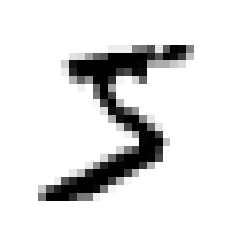

In [32]:
from IPython.display import set_matplotlib_formats
import matplotlib as mpl
import matplotlib.pyplot as plt 
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis('off')
plt.show()

In [36]:
y=y.astype(np.uint8)

In [58]:
X_train, X_test, y_train, y_test = X.to_numpy()[:60000], X.to_numpy()[60000:], y.to_numpy()[:60000], y.to_numpy()[60000:]

# Training a Binary Classifier 

A binary classifier is a machine learning model that makes predictions about a binary outcome. The outcome is either one of two possible classes, labeled as positive or negative. For example, a binary classifier might be used to predict whether an email is spam (positive class) or not spam (negative class). The classifier would be trained on a dataset of labeled emails and would learn to predict the class of an email based on features of the email such as the subject line, the sender, and the content of the message. When given a new email, the classifier would output a prediction of whether the email is spam or not.

Lets only try to identify one digit, lets say 5. This is an example of a binary classifier, distinguishing between just two classes. 

In [59]:
# Binary Classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [60]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [67]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

# Measuring Accuracy Using Cross-Validation

A good way to evaluate a model is to use the cross-validation.

*'StratifiedKFold*' is a K-fold cross-validation iterator that returns stratified folds. Stratified folds means that the proportions of the different classes in the folds are the same as the proportions of the different classes in the entire dataset. This is particularly useful for datasets where the distribution of classes is unbalanced, as it ensures that each fold has a representative ratio of classes. This can be useful in cases where the model's performance depends on the relative proportions of the classes in the training and testing data.

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  #print(train_index, test_index)
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]  

  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


0.9669
0.91625
0.96785


In [69]:
# lets use the build-in function to evaluate the model 

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Above 93% accuracy is amazing! But before we get too excited, lets look at a very dumb classifier that just classifies every single digit image in the "not-5" class:

In [75]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

Lets try to find out the accuracy of this classifier. 

In [76]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring= 'accuracy')

array([0.91125, 0.90855, 0.90915])

This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. This shows why accuracy is not a good preferred performance measure for classifiers, especially when you are dealing with skewed datasets.

## Why accuracy is not a good performance measure?

Accuracy is not always the best performance measure for classifiers because it can be misleading in certain cases. For example, consider a binary classifier that is trying to predict whether a patient has a certain disease or not. If the disease is rare, the classifier could simply predict that every patient does not have the disease, and it would be correct most of the time. However, this classifier would not be very useful because it is not able to detect the rare positive cases.

In such cases, it is more informative to look at other performance measures such as precision, recall, and F1 score. Precision measures the proportion of positive predictions that are actually correct, while recall measures the proportion of actual positive cases that were correctly predicted. The F1 score is the harmonic mean of precision and recall, and it is often used as a single metric to evaluate the performance of a classifier.

In summary, accuracy is a useful performance measure, but it can be misleading in cases where the classes are imbalanced or the consequences of false predictions are not the same for both classes. In such cases, it is important to consider other performance measures as well.

# Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classifier. It helps to visualize the number of correct and incorrect predictions made by the classifier and allows you to calculate various performance metrics such as precision, recall, and F1 score.

The confusion matrix is often used in the field of machine learning and data mining. It is a table with two rows and two columns, and contains the following information:

1. **True Positives (TP)**: These are cases where the classifier predicted the positive class, and the true class was also the positive class.
2. **True Negatives (TN)**: These are cases where the classifier predicted the negative class, and the true class was also the negative class.
3. **False Positives (FP)**: These are cases where the classifier predicted the positive class, but the true class was the negative class. These are also known as "Type I errors."
4. **False Negatives (FN)**: These are cases where the classifier predicted the negative class, but the true class was the positive class. These are also known as "Type II errors."

Using the values in the confusion matrix, you can calculate various performance metrics such as precision, recall, and F1 score. For example, **precision is calculated as TP / (TP + FP)**, and **recall is calculated as TP / (TP + FN)**. The F1 score is the harmonic mean of precision and recall.